### 环境

In [1]:
#导包
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import sys
import math
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['simsun']
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#python 版本
print(sys.version)
#各种包版本
!pip list

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Package                            Version
---------------------------------- -------------------
absl-py                            0.11.0
alabaster                          0.7.12
alembic                            1.5.7
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bc

### 读取数据

In [3]:
#_NASE_PATH存放数据的文件夹
_BASE_PATH = r'D:/DM/'
# _BASE_PATH = r'E:\python\data\成绩数据'

menuinst                           1.4.16
mistune                            0.8.4
mkl-fft                            1.1.0
mkl-random                         1.1.1
mkl-service                        2.3.0
mock                               4.0.2
more-itertools                     8.4.0
mpmath                             1.1.0
msgpack                            1.0.0
multipledispatch                   0.6.0
navigator-updater                  0.2.1
nbconvert                          5.6.1
nbformat                           5.0.7
networkx                           2.4
nltk                               3.5
nose                               1.3.7
notebook                           6.0.3
numba                              0.50.1
numexpr                            2.7.1
numpy                              1.18.5
numpydoc                           1.1.0
oauthlib                           3.1.0
olefile                            0.46
opencv-contrib-python              4.4.0.46
opencv-python  

In [4]:
#文件路径
files_path = [os.path.join(_BASE_PATH, path) for path in os.listdir(_BASE_PATH)]
#读取数据
data = [pd.read_excel(file_path) for file_path in files_path]
#合并数据
data = pd.concat(data,ignore_index=True)

### 数据清洗

#### 删除不相关列
序号列并无实际意义，直接删除

In [5]:
drop_columns = ['序号']
data.drop(drop_columns,axis=1, inplace=True)
data

学号         开课学期        班级名称        课程号                  课程名称  \
0        1040407113  2012-2013-2    10404071  04040083a                   运筹学   
1        1040407113  2013-2014-1    10404071  04040057b                决策支持系统   
2        1040407113  2011-2012-2    10404071  04040165a  数据库原理与应用(SQL_server)   
3        1040407113  2011-2012-1    10404071  04040162a                  数据结构   
4        1040407113  2011-2012-1    10404071  04040064b                  认识实习   
...             ...          ...         ...        ...                   ...   
45591  162210503201  2017-2018-2  1622104092  04040020b                电子商务概论   
45592  162210503201  2017-2018-2  1622104092  10000002b               文献检索与利用   
45593  162210503201  2017-2018-1  1622104092  07010004a                   体育3   
45594  162210503201  2017-2018-2  1622104092  07010005a                   体育4   
45595            学号         开课学期        班级名称        课程号                  课程名称   

       总成绩  成绩标志      课程性质  课程属性  学时   学分       开课单位  录入人  考试性质         补重学期  \
0       73   NaN        其他    必修  64    4     经济管理学院  张成龙   重修一  2012-2013-2   
1        优   NaN        其他    任选  32    2     经济管理学院  张成龙  正常考试          NaN   
2       97   NaN        其他    必修  64    4     经济管理学院  盛永祥  正常考试          NaN   
3       80   NaN        其他    必修  56  3.5     经济管理学院  吕向阳  正常考试          NaN   
4        优   NaN        其他    必修   0    1     经济管理学院  吕向阳  正常考试          NaN   
...    ...   ...       ...   ...  ..  ...        ...  ...   ...          ...   
45591   90   NaN  学科平台基础课程    必修  32    2     经济管理学院  张轶堃  正常考试          NaN   
45592   90   NaN  通识教育基础课程    必修  16    1  图书馆、学报编辑部   冯进  正常考试          NaN   
45593   91   NaN  通识教育基础课程    必修  32    1       体育学院  沈江勇  正常考试          NaN   
45594   96   NaN  通识教育基础课程    必修  32    1       体育学院  沈江勇  正常考试          NaN   
45595  总成绩  成绩标志      课程性质  课程属性  学时   学分       开课单位  录入人  考试性质         补重学期   

                   备注  姓  
0                 NaN  庄  
1                 NaN  庄  
2                 NaN  庄  
3                 NaN  庄  
4                 NaN  庄  
...               ... ..  
45591             NaN  冯  
45592             NaN  冯  
45593  2018.01.23导入_沈  冯  
45594      20180710沈导  冯  
45595              备注  姓  

[45596 rows x 17 columns]

#### 删除无用的行

In [6]:
data['学号'].unique()

array(['1040407113', '学号', '1040407114', '1040407115', '1040407116',
       '1040407117', '1040407118', '1040407119', '1040407120',
       '1040407121', '1040407123', '1040407124', '1040407125',
       '1040407126', '1040407127', '1040407128', '0940407122',
       '0940407125', '0940407131', '1040407101', '1040407102',
       '1040407103', '1040407104', '1040407105', '1040407106',
       '1040407107', '1040407108', '1040407109', '1040407111',
       '1040407112', '0840407202', '1040407201', '1040407202',
       '1040407203', '1040407204', '1040407205', '1040407206',
       '1040407207', '1040407208', '1040407209', '1040407210',
       '1040407211', '1040407212', '1040407213', '1040407214',
       '1040407215', '1040407216', '1040407217', '1040407218',
       '1040407219', '1040407220', '1040407222', '1040407223',
       '1040407226', '1040407227', '1040407228', '1140407101',
       '1140407102', '1140407103', '1140407104', '1140407106',
       '1140407107', '1140407108', '1140407110', 

<font face='宋体'>从上面可以看出学号中'<b>学号</b>'是错误的项，将其索引出来查看是什么</font>

In [7]:
data[data['学号']=='学号']

学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人  \
50     学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
101    学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
152    学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
203    学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
254    学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
...    ..   ...   ...  ...   ...  ...   ...   ...   ...  ..  ..   ...  ...   
45428  学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
45479  学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
45530  学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
45581  学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   
45595  学号  开课学期  班级名称  课程号  课程名称  总成绩  成绩标志  课程性质  课程属性  学时  学分  开课单位  录入人   

       考试性质  补重学期  备注  姓  
50     考试性质  补重学期  备注  姓  
101    考试性质  补重学期  备注  姓  
152    考试性质  补重学期  备注  姓  
203    考试性质  补重学期  备注  姓  
254    考试性质  补重学期  备注  姓  
...     ...   ...  .. ..  
45428  考试性质  补重学期  备注  姓  
45479  考试性质  补重学期  备注  姓  
45530  考试性质  补重学期  备注  姓  
45581  考试性质  补重学期  备注  姓  
45595  考试性质  补重学期  备注  姓  

[893 rows x 17 columns]

<font face='宋体'>索引出来后，发现是重复的表头，可以直接删掉</font>

In [8]:
data.drop(index=data[data['学号']=='学号'].index,axis=0, inplace=True)
data[data['学号']=='学号']

Empty DataFrame
Columns: [学号, 开课学期, 班级名称, 课程号, 课程名称, 总成绩, 成绩标志, 课程性质, 课程属性, 学时, 学分, 开课单位, 录入人, 考试性质, 补重学期, 备注, 姓]
Index: []

#### 删除重复行

统计重复行

In [9]:
data.duplicated(keep=False).sum()

37512

删除重复行

In [10]:
data = data.drop_duplicates(subset=data.columns,ignore_index=True)

In [11]:
data.shape

(23062, 17)

#### 处理缺失值
<hr style="border: .5px solid #ccc;">

1. <font face='宋体'>通过info查看每列的信息</font>
2. <font face='宋体'>通过isna函数统计缺失个数</font>
3. <font face='宋体'>查看具有缺失值的列，找出缺失值的可能原因</font>
4. <font face='宋体'>使用合理的方法填充缺失值</font>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23062 entries, 0 to 23061
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   学号      23062 non-null  object
 1   开课学期    23062 non-null  object
 2   班级名称    23062 non-null  object
 3   课程号     23062 non-null  object
 4   课程名称    23062 non-null  object
 5   总成绩     23062 non-null  object
 6   成绩标志    144 non-null    object
 7   课程性质    21784 non-null  object
 8   课程属性    23062 non-null  object
 9   学时      23062 non-null  object
 10  学分      23062 non-null  object
 11  开课单位    23062 non-null  object
 12  录入人     23060 non-null  object
 13  考试性质    23062 non-null  object
 14  补重学期    976 non-null    object
 15  备注      2722 non-null   object
 16  姓       23062 non-null  object
dtypes: object(17)
memory usage: 3.0+ MB


#### 过滤数据
过滤出需要的数据，即：<b>考试性质只考虑“正常考试”（即只考虑初修成绩）和专业课</b>

##### 选择课程名称作为课程的标识
通过统计发现，虽然课程名称相同，但是课程号却是不同的，
我也不知道这里不同课程号课程会有什么区别，
这里为了方便起见，
假设课程名称相同，课程是一样的，<b>以课程名称为主，不使用课程号</b>

In [13]:
#统计 相同课程名称 课程号不同
for c,df in data.groupby('课程名称'):
    if df['课程号'].unique().shape[0]>1:
        unique = ','.join(df['课程号'].unique().tolist())
        print(f'{c:<30}{unique:<10}')

会计信息系统分析与设计                   04040161a,04040043a
基础会计学                         04030068b,04030068a,04030121a
大学英语1                         08010001a,08010028a
大学英语2                         08010005a,08010089a
大学英语3                         08020003a,08020106a
大学计算机基础                       04040301b,19010005b
就业指导                          04010289b,09130095b
市场营销学                         04010076b,04Z10055b
成本会计学                         04030035b,04030036b
操作系统                          04040164a,19020002a
数据结构                          04040162a,19020101a,05040102a,19040134a
文献检索与利用                       10000003b,10000002b
概率论与数理统计                      05030010b,05030010a
管理学                           04010197a,04010135a,04010230a
管理沟通                          04010021b,09070025b
经济法                           04010048b,04010048a
经管英语综合训练                      04040170b,04010212b
英语网络自主学习                      08010084b,08010085b
计算机程序设计语言(VC++)               04040303a,19010002a
计算机网络技术与应用

##### 对课程性质进行统一
又通过统计发现，相同课程名称，课程属性却不同的

In [14]:
#统计课程名称相同，但课程属性不同的课程
for col in data['课程名称'].unique().tolist():
    l = data[data['课程名称']==col]['课程性质'].unique().tolist()
    if np.nan in l:
        l.remove(np.nan)
    if '其他' in l and len(l)!=1:
        l.remove('其他')
    if len(l) > 1:
        print('{0:<40}{1:<20}'.format(col,''.join(str(l))))

思想道德修养与法律基础                             ['通识教育基础课程', '通识教育课程']
成本会计学                                   ['专业课', '学科平台基础课程'] 
大学英语4                                   ['通识教育基础课程', '工程基础课']
形势与政策实践                                 ['通识教育基础课程', '实践性环节']
高等数学A1                                  ['通识教育课程', '通识教育基础课程']
高等数学A2                                  ['通识教育基础课程', '通识教育课程']
概率论与数理统计                                ['通识教育基础课程', '通识教育课程']
计算机程序设计语言(VC++)                         ['通识教育基础课程', '公共课', '通识教育课程']
系统工程的理论(校公选B类/科技)                       ['通识教育基础课程', '公共任选课', '专业任选课']
市场营销学(D)                                ['学科平台基础课程', '专业课'] 
系统工程                                    ['专业课', '学科平台基础课程'] 
博弈论基础(校公选B类/科技)                         ['通识教育基础课程', '公共任选课']
管理学(B)                                  ['学科平台基础课程', '通识教育基础课程']
经济法(C)                                  ['专业课', '学科平台基础课程'] 
服务管理                                    ['专业课', '学科平台基础课程'] 
走进材料世界(校公选B类/科技)                        ['通识教育基础课程'

即使 '班级名称','课程名称','开课学期','课程号' 都相同，仍然有许多课程的 '课程性质' 不同，这说明课程性质数据存在很大的错误

In [15]:
#通过groupby_col对data进行分租，统计每print_col是否为相同值，不同的进行输出，extra_col额外展示的列，is_display是否需要打印
def diff(data,groupby_col, print_col,extra_col=[],is_display=False):
    '''
    对数据进行分组，输出每组中 指定列 值不统一的分组及其相关信息

    Parameters
    ----------
    data : DataFranme
        需要统计的输入数据
    groupby_col: List
        数据data中的分组标志
    print_col : str
        统计的列，如果每组中该列的值不一样，则会输出该组
        该值必须属于data.columns
    extra_col : List, default []
        需要额外统计展示的列
    is_display : bool, default False
        是否打印出结果
        .. versionadded:: 0.0.0

    Returns
    -------
    dict
        返回字典，{分组标志值:每组中print_col中的值}
        只返回print_col为多个的值 
    '''
    diff_col = {}
    for c,df in data.groupby(groupby_col):
        #unique每组中print_col的去重值
        unique = df[print_col].unique()
        if unique.shape[0]>1:#过滤print_col值不一样个数少于2的
            diff_col[c] = unique.tolist()
            if is_display:
                print(c, '\t', unique, '\t',*[df[col].unique() for col in extra_col])
    return diff_col
_ = diff(data,['班级名称','课程名称','开课学期','课程号'],'课程性质',[], True)

(1522104091, '信息系统分析与设计', '2015-2016-1', '04040317a') 	 ['专业课' nan] 	
(1522104091, '应用统计(A)', '2017-2018-1', '04030216a') 	 ['学科平台基础课程' nan] 	
(1522104091, '成本会计学', '2015-2016-1', '04030035b') 	 [nan '学科平台基础课程'] 	
(1522104091, '数据结构', '2016-2017-1', '04040162a') 	 ['学科平台基础课程' '其他'] 	
(1522104091, '现代经济学(B)', '2013-2014-2', '04020302a') 	 ['学科平台基础课程' '其他'] 	
(1522104091, '现代经济学(B)', '2016-2017-2', '04020302a') 	 ['学科平台基础课程' '其他'] 	
(1522104091, '电子商务应用开发技术', '2014-2015-2', '04040022a') 	 ['其他' '学科平台基础课程'] 	
(1522104091, '电子商务应用开发技术', '2016-2017-2', '04040022a') 	 ['学科平台基础课程' '其他'] 	
(1522104091, '管理学(B)', '2013-2014-1', '04010302a') 	 ['其他' '学科平台基础课程'] 	
(1522104091, '管理学(B)', '2015-2016-1', '04010302a') 	 ['其他' '学科平台基础课程'] 	
(1522104091, '经济法(C)', '2014-2015-1', '04010311b') 	 ['其他' '专业课'] 	
(1522104091, '经济法(C)', '2015-2016-1', '04010311b') 	 ['专业课' nan] 	
(1522104091, '职业生涯与发展规划', '2015-2016-1', '09130094b') 	 ['其他' '通识教育基础课程'] 	
(1522104092, '信息系统分析与设计', '2015-2016-1', '04040317a') 


以课程名称为分组列，同一名称的课程按以下优先级顺序进行统一<br>
专业课 专业任选课 实践性环节 工程基础课 学科平台基础课程 学科基础课 公共基础课 公共课 公共任选课 通识教育基础课程 通识教育课程 其他<br>
特例：如果课程名称中含有 '校公选' 则直接认为是 公共任选课

In [16]:
#课程性质 不统一的 课程
diff_dict = diff(data,['课程名称'],'课程性质')

#applay回调函数 对课程性质进行统一
def call_func(x):
    global diff_dict
    # 优先级列表，越靠前，越优先选取
    priority = ['专业课', '专业任选课', '实践性环节', '工程基础课', '学科平台基础课程', '学科基础课' ,'公共基础课', '公共课', '公共任选课', '通识教育基础课程', '通识教育课程', '其他', np.nan]
    course_name = x['课程名称']
    #课程名称含有校公选 为特例
    if '校公选' in course_name:
        x['课程性质'] = '公共任选课'
    elif x['课程名称'] in diff_dict:
        name = np.nan
        for course_name in diff_dict[x['课程名称']]:
            if priority.index(course_name) < priority.index(name):
                name = course_name
        x['课程性质'] = name
    return x
data = data.apply(call_func,axis=1)
_ = diff(data,['课程名称'],'课程性质',[],True)

##### 过滤出初修成绩
通过统计发现， 当'<b>班级名称</b>','<b>课程名称</b>','<b>学号</b>'都相同时，但是会出现多条记录，这是由于刷分、重修、缓考或者补考等现象导致，所以需要进行逐一处理，得到初修成绩

In [17]:
#分组标志列
mark_col = ['班级名称','课程名称','课程号','学号','开课学期','课程性质']
_ = diff(data,mark_col,'总成绩',['成绩标志','学时','学分','开课单位','录入人','考试性质','补重学期','备注'], True)

(1522104091, '信息系统分析与设计', '04040317a', 1340407108, '2015-2016-1', '专业课') 	 [31 0 35] 	 [nan '缺考'] [0] [3] ['经济管理学院'] ['欧镇' '苗虹'] ['正常考试' '补考一'] ['2016-2017-1' '2015-2016-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 1340407139, '2015-2016-1', '专业课') 	 [60 38] 	 [nan] [0] [3] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409107, '2017-2018-1', '专业课') 	 [60 38] 	 [nan] [48] [3] ['经济管理学院'] ['欧镇'] ['补考一' '正常考试'] ['2017-2018-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409109, '2017-2018-1', '专业课') 	 [46 60] 	 [nan] [48] [3] ['经济管理学院'] ['欧镇'] ['正常考试' '补考一'] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409119, '2017-2018-1', '专业课') 	 [42 75] 	 [nan] [48] [3] ['经济管理学院'] ['欧镇'] ['正常考试' '补考一'] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409126, '2017-2018-1', '专业课') 	 [37 57] 	 [nan] [48] [3] ['经济管理学院'] ['欧镇'] ['正常考试' '补考一'] [nan '2017-2018-1'] [nan]
(1522104091, '

(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409111, '2015-2016-2', '公共课') 	 [68 21] 	 [nan] [0 72] [4.5] ['经济管理学院'] ['王志英' '吕向阳'] ['正常考试'] ['2016-2017-2' nan] [nan]
(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409112, '2015-2016-2', '公共课') 	 [75 57] 	 [nan] [72] [4.5] ['经济管理学院'] ['吕向阳'] ['正常考试'] ['2015-2016-2' nan] [nan]
(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409113, '2015-2016-2', '公共课') 	 [45 0 41 70] 	 [nan '缺考'] [0 72] [4.5] ['经济管理学院'] ['王志英' '吕向阳'] ['正常考试'] ['2016-2017-2' '2015-2016-2' nan '2017-2018-2'] [nan]
(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409120, '2015-2016-2', '公共课') 	 [79 28 46] 	 [nan] [0 72] [4.5] ['经济管理学院'] ['王志英' '吕向阳'] ['正常考试'] ['2016-2017-2' '2015-2016-2' nan] [nan]
(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409126, '2015-2016-2', '公共课') 	 [37 39] 	 [nan] [72] [4.5] ['经济管理学院'] ['吕向阳'] ['正常考试'] ['2015-2016-2' nan] [nan]
(1522104091, '计算机程序设计语言(VC++)', '04040303a', 152210409127, '2015-2016-2', '公共课') 	 [27 46] 	 [nan] [7

(1522104092, '电子商务应用开发技术', '04040022a', 152210409207, '2016-2017-2', '学科平台基础课程') 	 [40 68 28] 	 [nan] [64 0] [4] ['经济管理学院'] ['李正华' '尹隽'] ['正常考试' '补考一'] [nan '2017-2018-2' '2016-2017-2'] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 152210409213, '2016-2017-2', '学科平台基础课程') 	 [32 74] 	 [nan] [64 0] [4] ['经济管理学院'] ['李正华' '尹隽'] ['正常考试'] [nan '2017-2018-2'] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 152210409215, '2016-2017-2', '学科平台基础课程') 	 [68 20] 	 [nan] [0 64] [4] ['经济管理学院'] ['尹隽' '李正华'] ['正常考试'] ['2017-2018-2' nan] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 152210409218, '2016-2017-2', '学科平台基础课程') 	 [76 0] 	 [nan '作弊'] [0 64] [4] ['经济管理学院'] ['尹隽' '李正华'] ['正常考试'] ['2017-2018-2' nan] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 152210409225, '2016-2017-2', '学科平台基础课程') 	 [69 0] 	 [nan '卷面0分'] [0 64] [4] ['经济管理学院'] ['尹隽' '李正华'] ['正常考试'] ['2017-2018-2' nan] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 152210409226, '2016-2017-2', '学科平台基础课程') 	 [60 36] 	 [nan] [64] [4] ['经济管理学院'] ['李

('10404072', '程序设计语言(VC++)', '04040155a', '1040407202', '2010-2011-2', '其他') 	 ['34' '43'] 	 [nan] ['72'] ['4.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2010-2011-2' nan] ['原34' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407203', '2010-2011-2', '其他') 	 ['40' '39'] 	 [nan] ['72'] ['4.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2010-2011-2' nan] ['原40' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407205', '2010-2011-2', '其他') 	 ['41' '39'] 	 [nan] ['72'] ['4.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2010-2011-2' nan] ['原41' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407212', '2010-2011-2', '其他') 	 ['42' '45'] 	 [nan] ['72'] ['4.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2010-2011-2' nan] ['原42' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407216', '2010-2011-2', '其他') 	 ['49' '42'] 	 [nan] ['72'] ['4.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2010-2011-2' nan] ['原49' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407217', '2010-2011-2', '其他') 	 ['43' '37'] 	 [nan] [

('12404071', '会计信息系统分析与设计', '04040161a', '1240407113', '2015-2016-1', '其他') 	 ['77' '0'] 	 [nan '缓考'] ['0'] ['2'] ['经济管理学院'] ['欧镇'] ['补考一' '正常考试'] ['2015-2016-1'] [nan]
('12404071', '关系数据库管理系统', '04040154a', '0940407127', '2010-2011-1', '其他') 	 ['41' '60'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['苗虹'] ['正常考试' '补考一'] [nan '2010-2011-1'] [nan 'bk,原71']
('12404071', '关系数据库管理系统', '04040154a', '1240407101', '2013-2014-1', '其他') 	 ['60' '41'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2013-2014-1' nan] ['原:61' nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407117', '2013-2014-1', '其他') 	 ['0' '37'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2013-2014-1' nan] [nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407119', '2013-2014-1', '其他') 	 ['46' '60'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['苗虹'] ['正常考试' '补考一'] [nan '2013-2014-1'] [nan '原:70']
('12404071', '关系数据库管理系统', '04040154a', '1240407120', '2013-2014-1', '其他') 	 ['60' '36'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常

('13404071', '信息系统分析与设计', '04040317a', '1340407110', '2015-2016-1', '专业课') 	 ['61' '51' '44'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['欧镇' '苗虹'] ['正常考试' '补考一'] ['2016-2017-1' '2015-2016-1' nan] [nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407112', '2015-2016-1', '专业课') 	 ['60' '39'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407116', '2015-2016-1', '专业课') 	 ['72' '0' '39'] 	 [nan '缺考'] ['0'] ['3'] ['经济管理学院'] ['欧镇' '苗虹'] ['正常考试' '补考一'] ['2016-2017-1' '2015-2016-1' nan] [nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407120', '2015-2016-1', '专业课') 	 ['36' '60'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['正常考试' '补考一'] [nan '2015-2016-1'] [nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407122', '2015-2016-1', '专业课') 	 ['60' '41'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407123', '2015-2016-1', '专业课') 	 ['75' '39'] 	 [nan] ['0'] ['3']

('13404072', '信息系统分析与设计', '04040317a', '1340407207', '2015-2016-1', '专业课') 	 ['86' '71'] 	 [nan] ['48' '0'] ['3'] ['经济管理学院'] ['欧镇' '苗虹'] ['重修一' '正常考试'] ['2016-2017-1' nan] [nan]
('13404072', '信息系统分析与设计', '04040317a', '1340407208', '2015-2016-1', '专业课') 	 ['66' '0' '43'] 	 [nan '缺考'] ['0'] ['3'] ['经济管理学院'] ['欧镇' '苗虹'] ['正常考试' '补考一'] ['2016-2017-1' '2015-2016-1' nan] [nan]
('13404072', '信息系统分析与设计', '04040317a', '1340407215', '2015-2016-1', '专业课') 	 ['75' '44'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
('13404072', '信息系统分析与设计', '04040317a', '1340407217', '2015-2016-1', '专业课') 	 ['60' '40'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
('13404072', '信息系统分析与设计', '04040317a', '1340407220', '2015-2016-1', '专业课') 	 ['75' '38'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['苗虹'] ['补考一' '正常考试'] ['2015-2016-1' nan] [nan]
('13404072', '信息系统分析与设计', '04040317a', '1340407221', '2015-2016-1', '专业课') 	 ['48' '60'] 	 [nan] ['0'] ['3'] ['经济管理学院'] ['

('14404071', '电子商务应用开发技术', '04040022a', '1440407116', '2015-2016-2', '学科平台基础课程') 	 ['10' '46'] 	 [nan] ['64'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试'] ['2015-2016-2' nan] [nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407119', '2015-2016-2', '学科平台基础课程') 	 ['0' '20'] 	 ['卷面0分' nan] ['64' '0'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试' '重修一'] [nan '2016-2017-2'] [nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407120', '2015-2016-2', '学科平台基础课程') 	 ['60' '41'] 	 [nan] ['64'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试'] ['2015-2016-2' nan] [nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407122', '2015-2016-2', '学科平台基础课程') 	 ['75' '48'] 	 [nan] ['64'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试'] ['2015-2016-2' nan] [nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407130', '2015-2016-2', '学科平台基础课程') 	 ['32' '23'] 	 [nan] ['64' '0'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试' '重修一'] [nan '2016-2017-2'] [nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407132', '2015-2016-2', '学科平台基础课程') 	 ['60' '48'] 	 [nan] ['64'] ['4'] ['经济管理学院

('14404072', '现代经济学(B)', '04020302a', '1440407214', '2014-2015-2', '学科平台基础课程') 	 ['0' '53'] 	 ['缺考' nan] ['0' '48'] ['3'] ['经济管理学院'] ['黄洪斌' '姚永龙'] ['重修一' '正常考试'] ['2015-2016-1' nan] [nan '+缺考']
('14404072', '现代经济学(B)', '04020302a', '1440407216', '2014-2015-2', '学科平台基础课程') 	 ['75' '50'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['姚永龙'] ['补考一' '正常考试'] ['2014-2015-2' nan] ['+补考原成绩77' nan]
('14404072', '现代经济学(B)', '04020302a', '1440407227', '2014-2015-2', '学科平台基础课程') 	 ['75' '55'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['姚永龙'] ['补考一' '正常考试'] ['2014-2015-2' nan] ['+补考原成绩85' nan]
('14404072', '现代经济学(B)', '04020302a', '1440407229', '2014-2015-2', '学科平台基础课程') 	 ['75' '56'] 	 [nan] ['48'] ['3'] ['经济管理学院'] ['姚永龙'] ['补考一' '正常考试'] ['2014-2015-2' nan] ['+补考原成绩75' nan]
('14404072', '电子商务应用开发技术', '04040022a', '1340407222', '2014-2015-2', '学科平台基础课程') 	 ['33' '1'] 	 [nan] ['0' '64'] ['4'] ['经济管理学院'] ['李正华'] ['正常考试'] ['2015-2016-2' nan] [nan]
('14404072', '电子商务应用开发技术', '04040022a', '1340407228', '2014-2015-2', '学科平台基础课程

('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409103', '2017-2018-1', '学科平台基础课程') 	 ['0' '83'] 	 ['缓考' nan] ['64'] ['4'] ['经济管理学院'] ['鞠可一'] ['正常考试' '补考一'] ['2017-2018-1'] [nan]
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409114', '2017-2018-1', '学科平台基础课程') 	 ['0' '89'] 	 ['缓考' nan] ['64'] ['4'] ['经济管理学院'] ['鞠可一'] ['正常考试' '补考一'] ['2017-2018-1'] [nan]
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409117', '2017-2018-1', '学科平台基础课程') 	 ['81' '0'] 	 [nan '缓考'] ['64'] ['4'] ['经济管理学院'] ['鞠可一'] ['补考一' '正常考试'] ['2017-2018-1'] [nan]
('1622104091', '数据结构', '04040162a', '162210409109', '2017-2018-1', '学科平台基础课程') 	 ['0' '39'] 	 ['缺考' nan] ['56'] ['3.5'] ['经济管理学院'] ['吕向阳'] ['补考一' '正常考试'] ['2017-2018-1' nan] [nan]
('1622104091', '数据结构', '04040162a', '162210409111', '2017-2018-1', '学科平台基础课程') 	 ['79' '39' '40'] 	 [nan] ['56'] ['3.5'] ['经济管理学院'] ['吕向阳'] ['正常考试' '补考一'] ['2017-2018-2' '2017-2018-1' nan] [nan]
('1622104091', '数据结构', '04040162a', '162210409116', '20

如果 考试性质 不是 正常考试和补考一 则数据一定不是初修成绩，所以直接过滤重修

In [18]:
data['考试性质'].unique()

array(['重修一', '正常考试', '补考一'], dtype=object)

In [19]:
#选取正常考试和补考一的，补考也是初修成绩
data = data[(data['考试性质']=='正常考试') | (data['考试性质']=='补考一')]

去掉之后仍然有多条记录的的，

In [20]:
_ = diff(data,mark_col,'总成绩',['成绩标志','补重学期','备注'], True)

(1522104091, '信息系统分析与设计', '04040317a', 1340407108, '2015-2016-1', '专业课') 	 [31 0 35] 	 [nan '缺考'] ['2016-2017-1' '2015-2016-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 1340407139, '2015-2016-1', '专业课') 	 [60 38] 	 [nan] ['2015-2016-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409107, '2017-2018-1', '专业课') 	 [60 38] 	 [nan] ['2017-2018-1' nan] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409109, '2017-2018-1', '专业课') 	 [46 60] 	 [nan] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409119, '2017-2018-1', '专业课') 	 [42 75] 	 [nan] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409126, '2017-2018-1', '专业课') 	 [37 57] 	 [nan] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409128, '2017-2018-1', '专业课') 	 [37 51] 	 [nan] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409129, '2017-2018-1', '专业课') 	 [44 49] 	 [nan] [nan '2017-2018-1'] [nan]
(1522104091, '信息系统分析与设计', '0404

(1522104092, '成本会计学', '04030035b', 1340407224, '2015-2016-1', '专业课') 	 [65 '不及格'] 	 [nan] ['2016-2017-1' nan] [nan]
(1522104092, '数据结构', '04040162a', 152210409201, '2016-2017-1', '学科平台基础课程') 	 [80 25] 	 [nan] ['2017-2018-2' nan] [nan]
(1522104092, '数据结构', '04040162a', 152210409203, '2016-2017-1', '学科平台基础课程') 	 [60 42] 	 [nan] ['2016-2017-1' nan] ['原始成绩为:63' nan]
(1522104092, '数据结构', '04040162a', 152210409213, '2016-2017-1', '学科平台基础课程') 	 [75 44] 	 [nan] ['2016-2017-1' nan] [nan]
(1522104092, '数据结构', '04040162a', 152210409218, '2016-2017-1', '学科平台基础课程') 	 [52 37 78] 	 [nan] ['2016-2017-1' nan '2017-2018-1'] [nan]
(1522104092, '数据结构', '04040162a', 152210409226, '2016-2017-1', '学科平台基础课程') 	 [60 39] 	 [nan] ['2016-2017-1' nan] ['原始成绩为:68' nan]
(1522104092, '数据结构', '04040162a', 152210409227, '2016-2017-1', '学科平台基础课程') 	 [60 32 0] 	 [nan '缺考'] ['2017-2018-2' nan '2017-2018-1'] [nan]
(1522104092, '数据结构', '04040162a', 152210409236, '2016-2017-1', '学科平台基础课程') 	 [70 0 42] 	 [nan '缺考'] ['2017-201

('10404072', '关系数据库管理系统', '04040154a', '0840407202', '2009-2010-1', '其他') 	 ['50' '43'] 	 [nan] [nan '2009-2010-1'] [nan '原成绩43']
('10404072', '大学英语3', '08020003a', '1040407228', '2011-2012-1', '通识教育基础课程') 	 ['50' '55'] 	 [nan] ['2011-2012-1' nan] ['原50' 'yy']
('10404072', '操作系统', '04040164a', '1040407220', '2011-2012-2', '其他') 	 ['46' '60'] 	 [nan] [nan '2011-2012-2'] [nan]
('10404072', '数据结构', '04040162a', '1040407223', '2011-2012-1', '学科平台基础课程') 	 ['60' '0'] 	 [nan] [nan] ['原60' '缺考']
('10404072', '程序设计语言(VC++)', '04040155a', '1040407202', '2010-2011-2', '其他') 	 ['34' '43'] 	 [nan] ['2010-2011-2' nan] ['原34' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407203', '2010-2011-2', '其他') 	 ['40' '39'] 	 [nan] ['2010-2011-2' nan] ['原40' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407205', '2010-2011-2', '其他') 	 ['41' '39'] 	 [nan] ['2010-2011-2' nan] ['原41' nan]
('10404072', '程序设计语言(VC++)', '04040155a', '1040407212', '2010-2011-2', '其他') 	 ['42' '45'] 	 [nan] ['2010-2011-2' 

('12404071', '管理学', '04010197a', '1240407115', '2012-2013-2', '学科基础课') 	 ['56' '45'] 	 [nan] [nan '2012-2013-2'] [nan '原45']
('12404071', '管理学', '04010197a', '1240407117', '2012-2013-2', '学科基础课') 	 ['49' '60'] 	 [nan] [nan '2012-2013-2'] [nan '原68']
('12404071', '管理学', '04010197a', '1240407122', '2012-2013-2', '学科基础课') 	 ['46' '28'] 	 [nan] [nan '2012-2013-2'] [nan '原28']
('12404071', '线性代数', '05030034a', '1240407131', '2013-2014-1', '通识教育基础课程') 	 ['48' '75'] 	 [nan] [nan '2013-2014-1'] [nan '原:88']
('12404071', '计算机网络技术与应用', '04040172a', '1240407102', '2014-2015-2', '专业课') 	 ['75' '46'] 	 [nan] [nan] ['+补考原成绩78' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407117', '2014-2015-2', '专业课') 	 ['75' '48'] 	 [nan] [nan] ['+补考原成绩83' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407122', '2014-2015-2', '专业课') 	 ['75' '39'] 	 [nan] [nan] ['+补考原成绩78' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407130', '2014-2015-2', '专业课') 	 ['60' '44'] 	 [nan] [nan] ['+补考原成绩66' nan]
('12404072'

('13404071', '电子商务应用开发技术', '04040022a', '1340407118', '2014-2015-2', '学科平台基础课程') 	 ['0' '36' '34'] 	 [nan] [nan '2015-2016-2'] ['+缺考' nan]
('13404071', '电子商务应用开发技术', '04040022a', '1340407122', '2014-2015-2', '学科平台基础课程') 	 ['60' '36'] 	 [nan] [nan] ['+补考原成绩60' nan]
('13404071', '电子商务应用开发技术', '04040022a', '1340407124', '2014-2015-2', '学科平台基础课程') 	 ['36' '60'] 	 [nan] [nan] [nan '+补考原成绩60']
('13404071', '电子商务应用开发技术', '04040022a', '1340407133', '2014-2015-2', '学科平台基础课程') 	 ['36' '60'] 	 [nan] [nan] [nan '+补考原成绩61']
('13404071', '电子商务应用开发技术', '04040022a', '1340407137', '2014-2015-2', '学科平台基础课程') 	 ['7' '81'] 	 [nan] [nan '2016-2017-2'] [nan]
('13404071', '管理学(B)', '04010302a', '1340407107', '2013-2014-1', '学科平台基础课程') 	 ['45' '60'] 	 [nan] [nan '2013-2014-1'] [nan]
('13404071', '管理学(B)', '04010302a', '1340407129', '2013-2014-1', '学科平台基础课程') 	 ['56.5' '37.5'] 	 [nan] ['2013-2014-1' nan] [nan]
('13404071', '管理学(B)', '04010302a', '1340407136', '2013-2014-1', '学科平台基础课程') 	 ['52' '42.5'] 	 [nan] 

('14404071', '管理学(B)', '04010302a', '1440407134', '2014-2015-1', '学科平台基础课程') 	 ['60' '45'] 	 [nan] ['2014-2015-1' nan] ['原66' nan]
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407102', '2014-2015-2', '公共课') 	 ['56.6' '60'] 	 [nan] [nan '2014-2015-2'] ['原32' '原32+补考原成绩64']
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407110', '2014-2015-2', '公共课') 	 ['38' '60'] 	 [nan] [nan '2014-2015-2'] [nan '+补考原成绩60']
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407111', '2014-2015-2', '公共课') 	 ['38' '12'] 	 [nan] [nan '2014-2015-2'] [nan '+补考原成绩12']
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407113', '2014-2015-2', '公共课') 	 ['75' '70'] 	 [nan] [nan] ['2015-2016学年计算机冲抵' nan]
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407114', '2014-2015-2', '公共课') 	 ['70' '75'] 	 [nan] [nan] [nan '2015-2016学年计算机冲抵']
('14404071', '计算机程序设计语言(VC++)', '04040303a', '1440407116', '2014-2015-2', '公共课') 	 ['60' '40'] 	 [nan] ['2014-2015-2' nan] ['+补考原成绩66' nan]
('14404071', '计算机程序设计语言(VC++)', '0

('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409103', '2017-2018-1', '学科平台基础课程') 	 ['0' '83'] 	 ['缓考' nan] ['2017-2018-1'] [nan]
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409114', '2017-2018-1', '学科平台基础课程') 	 ['0' '89'] 	 ['缓考' nan] ['2017-2018-1'] [nan]
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409117', '2017-2018-1', '学科平台基础课程') 	 ['81' '0'] 	 [nan '缓考'] ['2017-2018-1'] [nan]
('1622104091', '数据结构', '04040162a', '162210409109', '2017-2018-1', '学科平台基础课程') 	 ['0' '39'] 	 ['缺考' nan] ['2017-2018-1' nan] [nan]
('1622104091', '数据结构', '04040162a', '162210409111', '2017-2018-1', '学科平台基础课程') 	 ['79' '39' '40'] 	 [nan] ['2017-2018-2' '2017-2018-1' nan] [nan]
('1622104091', '数据结构', '04040162a', '162210409116', '2017-2018-1', '学科平台基础课程') 	 ['64' '18'] 	 [nan] ['2017-2018-2' nan] [nan]
('1622104091', '数据结构', '04040162a', '162210409120', '2017-2018-1', '学科平台基础课程') 	 ['71' '32' '42'] 	 [nan] ['2017-2018-2' '2017-2018-1' nan] [nan]
('1622104091', '数据结构'

计算机冲抵不属于初修，删掉

In [21]:
data = data[~(data['备注'].str.find('计算机冲抵')>-1)]

剩余重复都是，缓考，补考缺考的记录导致，缓考、补考算初修，选初次与补考最大值，补考时缺考算第一次的值，因为补考缺考是0，所以直接取最大值

In [22]:
_d =diff(data,mark_col,'总成绩',['补重学期'], True)

(1522104091, '信息系统分析与设计', '04040317a', 1340407108, '2015-2016-1', '专业课') 	 [31 0 35] 	 ['2016-2017-1' '2015-2016-1' nan]
(1522104091, '信息系统分析与设计', '04040317a', 1340407139, '2015-2016-1', '专业课') 	 [60 38] 	 ['2015-2016-1' nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409107, '2017-2018-1', '专业课') 	 [60 38] 	 ['2017-2018-1' nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409109, '2017-2018-1', '专业课') 	 [46 60] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计', '04040317a', 152210409119, '2017-2018-1', '专业课') 	 [42 75] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计', '04040317a', 152210409126, '2017-2018-1', '专业课') 	 [37 57] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计', '04040317a', 152210409128, '2017-2018-1', '专业课') 	 [37 51] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计', '04040317a', 152210409129, '2017-2018-1', '专业课') 	 [44 49] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计', '04040317a', 152210409131, '2017-2018-1', '专业课') 	 [44 60] 	 [nan '2017-2018-1']
(1522104091, '信息系统分析与设计',

(1522104092, '数据结构', '04040162a', 152210409236, '2016-2017-1', '学科平台基础课程') 	 [70 0 42] 	 ['2017-2018-2' nan '2017-2018-1']
(1522104092, '数据结构', '04040162a', 152210409237, '2016-2017-1', '学科平台基础课程') 	 [82 29 37] 	 ['2017-2018-2' nan '2017-2018-1']
(1522104092, '现代经济学(B)', '04020302a', 152210409201, '2015-2016-2', '学科平台基础课程') 	 [50 40 64] 	 ['2015-2016-2' nan '2016-2017-2']
(1522104092, '现代经济学(B)', '04020302a', 152210409202, '2015-2016-2', '学科平台基础课程') 	 [60 35] 	 ['2015-2016-2' nan]
(1522104092, '现代经济学(B)', '04020302a', 152210409203, '2015-2016-2', '学科平台基础课程') 	 [60 35] 	 ['2015-2016-2' nan]
(1522104092, '现代经济学(B)', '04020302a', 152210409221, '2015-2016-2', '学科平台基础课程') 	 [60 35] 	 ['2015-2016-2' nan]
(1522104092, '现代经济学(B)', '04020302a', 152210409224, '2015-2016-2', '学科平台基础课程') 	 [0 35] 	 ['2015-2016-2' nan '2016-2017-2']
(1522104092, '现代经济学(B)', '04020302a', 152210409231, '2015-2016-2', '学科平台基础课程') 	 [35 25] 	 ['2017-2018-1' nan]
(1522104092, '现代经济学(B)', '04020302a', 152210409236, '2015

('11404071', '操作系统', '04040164a', '1140407102', '2012-2013-2', '其他') 	 ['0' '42'] 	 ['2012-2013-2' nan]
('11404071', '操作系统', '04040164a', '1140407120', '2012-2013-2', '其他') 	 ['47' '60'] 	 [nan '2012-2013-2']
('11404071', '数据结构', '04040162a', '1140407107', '2012-2013-1', '学科平台基础课程') 	 ['53' '38'] 	 ['2012-2013-1' nan]
('11404071', '数据结构', '04040162a', '1140407115', '2012-2013-1', '学科平台基础课程') 	 ['27' '42'] 	 ['2012-2013-1' nan]
('11404071', '数据结构', '04040162a', '1140407122', '2012-2013-1', '学科平台基础课程') 	 ['33' '45'] 	 ['2012-2013-1' nan]
('11404071', '数据结构', '04040162a', '1140407124', '2012-2013-1', '学科平台基础课程') 	 ['37' '20'] 	 [nan '2012-2013-1']
('11404071', '现代经济学', '04020088a', '1140407115', '2013-2014-1', '其他') 	 ['60' '42'] 	 ['2013-2014-1' nan]
('11404071', '现代经济学', '04020088a', '1140407120', '2013-2014-1', '其他') 	 ['40' '50'] 	 [nan '2013-2014-1']
('11404071', '电子商务应用开发技术', '04040022a', '1140407117', '2013-2014-1', '学科平台基础课程') 	 ['0' '36'] 	 ['2013-2014-1' nan]
('11404071', '电子商务应

('13404071', '信息系统分析与设计', '04040317a', '1340407110', '2015-2016-1', '专业课') 	 ['61' '51' '44'] 	 ['2016-2017-1' '2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407112', '2015-2016-1', '专业课') 	 ['60' '39'] 	 ['2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407116', '2015-2016-1', '专业课') 	 ['72' '0' '39'] 	 ['2016-2017-1' '2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407120', '2015-2016-1', '专业课') 	 ['36' '60'] 	 [nan '2015-2016-1']
('13404071', '信息系统分析与设计', '04040317a', '1340407122', '2015-2016-1', '专业课') 	 ['60' '41'] 	 ['2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407123', '2015-2016-1', '专业课') 	 ['75' '39'] 	 ['2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407132', '2015-2016-1', '专业课') 	 ['72' '30'] 	 ['2016-2017-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407133', '2015-2016-1', '专业课') 	 ['75' '43'] 	 ['2015-2016-1' nan]
('13404071', '信息系统分析与设计', '04040317a', '1340407136', '2015-2016-1', '专业课') 

('14404071', '现代经济学(B)', '04020302a', '1440407127', '2014-2015-2', '学科平台基础课程') 	 ['51' '60'] 	 [nan '2014-2015-2']
('14404071', '现代经济学(B)', '04020302a', '1440407130', '2014-2015-2', '学科平台基础课程') 	 ['53' '60'] 	 [nan '2014-2015-2']
('14404071', '电子商务应用开发技术', '04040022a', '1440407116', '2015-2016-2', '学科平台基础课程') 	 ['10' '46'] 	 ['2015-2016-2' nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407120', '2015-2016-2', '学科平台基础课程') 	 ['60' '41'] 	 ['2015-2016-2' nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407122', '2015-2016-2', '学科平台基础课程') 	 ['75' '48'] 	 ['2015-2016-2' nan]
('14404071', '电子商务应用开发技术', '04040022a', '1440407132', '2015-2016-2', '学科平台基础课程') 	 ['60' '48'] 	 ['2015-2016-2' nan]
('14404071', '管理学(B)', '04010302a', '1440407119', '2014-2015-1', '学科平台基础课程') 	 ['41' '45.8'] 	 ['2014-2015-1' nan]
('14404071', '管理学(B)', '04010302a', '1440407120', '2014-2015-1', '学科平台基础课程') 	 ['60' '43'] 	 ['2014-2015-1' nan]
('14404071', '管理学(B)', '04010302a', '1440407124', '2014-2015-1', '学科平台基础课程

('1622104091', '计算机网络技术与应用', '04040180a', '162210409109', '2018-2019-1', '专业课') 	 ['41' '55'] 	 [nan '2018-2019-1']
('1622104091', '计算机网络技术与应用', '04040180a', '162210409116', '2018-2019-1', '专业课') 	 ['35' '60'] 	 [nan '2018-2019-1']
('1622104092', 'Java程序设计', '04040173a', '162210409231', '2018-2019-1', '专业课') 	 ['60' '48'] 	 ['2018-2019-1' nan]
('1622104092', '信息系统分析与设计', '04040317a', '162210409223', '2018-2019-1', '专业课') 	 ['60' '45'] 	 ['2018-2019-1' nan]
('1622104092', '信息系统分析与设计', '04040317a', '162210409232', '2018-2019-1', '专业课') 	 ['60' '38'] 	 ['2018-2019-1' nan]
('1622104092', '信息系统分析与设计', '04040317a', '162210409233', '2018-2019-1', '专业课') 	 ['75' '45'] 	 ['2018-2019-1' nan]
('1622104092', '数据库原理与应用(SQL_server)', '04040165a', '162210409207', '2017-2018-1', '学科平台基础课程') 	 ['37' '75'] 	 [nan '2017-2018-1']
('1622104092', '数据库原理与应用(SQL_server)', '04040165a', '162210409228', '2017-2018-1', '学科平台基础课程') 	 ['60' '39'] 	 ['2017-2018-1' nan]
('1622104092', '数据库原理与应用(SQL_server)', '0404016

补重学期时间比开课时间大的属于重修 删掉重修<br>
例如开课学期为 2015-2016-1 补重学期 为 2015-2016-1则是补考，如果补重学期为2016-2017-1则为重修考试

In [23]:
#apply回调函数 对补重学期重新编码，0为空，1为补考，2为重修考试
def call_func(x):
    if type(x['补重学期'])== str:
        y1 = int(x['开课学期'].split('-')[0])
        y2 = int(x['补重学期'].split('-')[0])
        if(y1==y2):
            x['补重学期'] = 1
        else:
            x['补重学期'] = 2
    else:
        x['补重学期'] = 0
    return x
data = data.apply(call_func,axis=1)

In [24]:
#删掉重修的
data.drop(index=data[data['补重学期']==2].index,inplace=True)

In [25]:
_d =diff(data,mark_col,'总成绩',['备注'], True)

(1522104091, '信息系统分析与设计', '04040317a', 1340407108, '2015-2016-1', '专业课') 	 [0 35] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 1340407139, '2015-2016-1', '专业课') 	 [60 38] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409107, '2017-2018-1', '专业课') 	 [60 38] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409109, '2017-2018-1', '专业课') 	 [46 60] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409119, '2017-2018-1', '专业课') 	 [42 75] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409126, '2017-2018-1', '专业课') 	 [37 57] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409128, '2017-2018-1', '专业课') 	 [37 51] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409129, '2017-2018-1', '专业课') 	 [44 49] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409131, '2017-2018-1', '专业课') 	 [44 60] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409134, '2017-2018-1', '专业课') 	 [38 54] 	 [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409135, '2017-2018-1', '专业课') 

(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409210, '2015-2016-2', '公共课') 	 [47 50] 	 [nan]
(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409218, '2015-2016-2', '公共课') 	 [60 36] 	 [nan]
(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409219, '2015-2016-2', '公共课') 	 [51 75] 	 [nan '冲抵原成绩51分/沈江勇/2017/06/07']
(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409220, '2015-2016-2', '公共课') 	 [33 40] 	 [nan]
(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409224, '2015-2016-2', '公共课') 	 [28 37] 	 [nan]
(1522104092, '计算机程序设计语言(VC++)', '04040303a', 152210409227, '2015-2016-2', '公共课') 	 [20 44] 	 [nan]
(1522104092, '计算机网络技术与应用', '04040180a', 152210409201, '2017-2018-1', '专业课') 	 [0 63] 	 [nan]
(1522104092, '计算机网络技术与应用', '04040180a', 152210409204, '2017-2018-1', '专业课') 	 [0 78] 	 [nan]
(1522104092, '计算机网络技术与应用', '04040180a', 152210409228, '2017-2018-1', '专业课') 	 [0 88] 	 [nan]
('10404071', '关系数据库管理系统', '04040154a', '0940407122', '2010-2011-1', '其他') 	 ['37' '60'] 	 [nan 'bk,原6

('12404071', '会计信息系统分析与设计', '04040161a', '1240407113', '2015-2016-1', '其他') 	 ['77' '0'] 	 [nan]
('12404071', '关系数据库管理系统', '04040154a', '0940407127', '2010-2011-1', '其他') 	 ['41' '60'] 	 [nan 'bk,原71']
('12404071', '关系数据库管理系统', '04040154a', '1240407101', '2013-2014-1', '其他') 	 ['60' '41'] 	 ['原:61' nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407117', '2013-2014-1', '其他') 	 ['0' '37'] 	 [nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407119', '2013-2014-1', '其他') 	 ['46' '60'] 	 [nan '原:70']
('12404071', '关系数据库管理系统', '04040154a', '1240407120', '2013-2014-1', '其他') 	 ['60' '36'] 	 ['原:61' nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407125', '2013-2014-1', '其他') 	 ['0' '43'] 	 [nan]
('12404071', '关系数据库管理系统', '04040154a', '1240407126', '2013-2014-1', '其他') 	 ['55' '44'] 	 [nan]
('12404071', '大学英语2', '08010005a', '1240407131', '2012-2013-2', '通识教育基础课程') 	 ['45' '53'] 	 [nan '原53']
('12404071', '数据结构', '04040162a', '1240407120', '2013-2014-1', '学科平台基础课程') 	 ['39' '60'] 	 [nan '原:

('13404072', '现代经济学(B)', '04020302a', '1340407214', '2013-2014-2', '学科平台基础课程') 	 ['43' '60'] 	 [nan]
('13404072', '现代经济学(B)', '04020302a', '1340407232', '2013-2014-2', '学科平台基础课程') 	 ['17' '38'] 	 [nan]
('13404072', '现代经济学(B)', '04020302a', '1340407239', '2013-2014-2', '学科平台基础课程') 	 ['43' '23'] 	 [nan]
('13404072', '管理学', '04010197a', '1240407220', '2012-2013-2', '学科基础课') 	 ['38' '0'] 	 [nan '原0缺考']
('13404072', '计算机程序设计语言(VC++)', '04040303a', '1340407215', '2013-2014-2', '公共课') 	 ['17' '38'] 	 [nan]
('13404072', '计算机程序设计语言(VC++)', '04040303a', '1340407220', '2013-2014-2', '公共课') 	 ['34' '42'] 	 [nan]
('13404072', '计算机程序设计语言(VC++)', '04040303a', '1340407225', '2013-2014-2', '公共课') 	 ['60' '42'] 	 [nan]
('13404072', '计算机程序设计语言(VC++)', '04040303a', '1340407227', '2013-2014-2', '公共课') 	 ['0' '41'] 	 ['缺考' nan]
('13404072', '计算机程序设计语言(VC++)', '04040303a', '1340407238', '2013-2014-2', '公共课') 	 ['26' '36'] 	 [nan]
('14404071', '信息系统分析与设计', '04040317a', '1440407132', '2016-2017-1', '专业课') 	 ['

('1622104091', '企业信息系统及应用(EIS)', '04040312a', '162210409132', '2018-2019-2', '专业课') 	 ['47' '60'] 	 [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409127', '2018-2019-1', '专业课') 	 ['60' '42'] 	 [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409128', '2018-2019-1', '专业课') 	 ['60' '40'] 	 [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409129', '2018-2019-1', '专业课') 	 ['60' '43'] 	 [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409132', '2018-2019-1', '专业课') 	 ['60' '46'] 	 [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409134', '2018-2019-1', '专业课') 	 ['60' '46'] 	 [nan]
('1622104091', '大学英语1', '08010001a', '162210409107', '2016-2017-1', '通识教育基础课程') 	 ['0' '61'] 	 [nan '冲抵原成绩38分/沈江勇/2017/06/07']
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409103', '2017-2018-1', '学科平台基础课程') 	 ['0' '83'] 	 [nan]
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409114', '2017-2018-1', '学科平台基础课程') 	 ['0' '89'] 	 [nan]
('1622104091', '数据库原理与应用(SQL_s

剩余中出现多条记录是由于缺考、补考、缓考导致,他们都是初修的成绩<br>
删除备注为缺考的行，缺考的分数是0，值是最小的

In [26]:
#删除备注含有缺考的
d_note = data[data.duplicated(mark_col,keep=False)]
_index = d_note[d_note['备注'].str.find('缺考')>-1].index
data.drop(index=_index,inplace=True)

In [27]:
_d =diff(data,mark_col,'总成绩',['补重学期','备注'], True)

(1522104091, '信息系统分析与设计', '04040317a', 1340407108, '2015-2016-1', '专业课') 	 [0 35] 	 [1 0] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 1340407139, '2015-2016-1', '专业课') 	 [60 38] 	 [1 0] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409107, '2017-2018-1', '专业课') 	 [60 38] 	 [1 0] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409109, '2017-2018-1', '专业课') 	 [46 60] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409119, '2017-2018-1', '专业课') 	 [42 75] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409126, '2017-2018-1', '专业课') 	 [37 57] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409128, '2017-2018-1', '专业课') 	 [37 51] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409129, '2017-2018-1', '专业课') 	 [44 49] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409131, '2017-2018-1', '专业课') 	 [44 60] 	 [0 1] [nan]
(1522104091, '信息系统分析与设计', '04040317a', 152210409134, '2017-2018-1', '专业课') 	 [38 54] 	 [0 1] [nan]
(1522104091, '信

('10404071', '关系数据库管理系统', '04040154a', '0940407122', '2010-2011-1', '其他') 	 ['37' '60'] 	 [0 1] [nan 'bk,原60']
('10404071', '关系数据库管理系统', '04040154a', '1040407128', '2011-2012-1', '其他') 	 ['0' '80'] 	 [0] ['缓考' '缓考原80']
('10404071', '操作系统', '04040164a', '1040407116', '2011-2012-2', '其他') 	 ['37' '42'] 	 [0 1] [nan]
('10404071', '操作系统', '04040164a', '1040407120', '2011-2012-2', '其他') 	 ['49' '44'] 	 [0 1] [nan]
('10404071', '程序设计语言(VC++)', '04040155a', '1040407109', '2010-2011-2', '其他') 	 ['47' '40'] 	 [1 0] ['原47' nan]
('10404071', '程序设计语言(VC++)', '04040155a', '1040407120', '2010-2011-2', '其他') 	 ['37' '35'] 	 [1 0] ['原37' nan]
('10404071', '管理信息系统(双语)', '04040171a', '1040407118', '2012-2013-2', '其他') 	 ['55' '46'] 	 [1 0] ['原55' nan]
('10404071', '管理信息系统(双语)', '04040171a', '1040407121', '2012-2013-2', '其他') 	 ['60' '49'] 	 [1 0] ['原61' nan]
('10404071', '管理信息系统(双语)', '04040171a', '1040407123', '2012-2013-2', '其他') 	 ['53' '54'] 	 [1 0] ['原53' nan]
('10404071', '管理信息系统(双语)', '04040171a'

('12404071', '数据结构', '04040162a', '1240407126', '2013-2014-1', '学科平台基础课程') 	 ['44' '40'] 	 [1 0] [nan]
('12404071', '数据结构', '04040162a', '1240407129', '2013-2014-1', '学科平台基础课程') 	 ['60' '54.8'] 	 [1 0] ['原:36' '原:30']
('12404071', '管理学', '04010197a', '1240407115', '2012-2013-2', '学科基础课') 	 ['56' '45'] 	 [0 1] [nan '原45']
('12404071', '管理学', '04010197a', '1240407117', '2012-2013-2', '学科基础课') 	 ['49' '60'] 	 [0 1] [nan '原68']
('12404071', '管理学', '04010197a', '1240407122', '2012-2013-2', '学科基础课') 	 ['46' '28'] 	 [0 1] [nan '原28']
('12404071', '线性代数', '05030034a', '1240407131', '2013-2014-1', '通识教育基础课程') 	 ['48' '75'] 	 [0 1] [nan '原:88']
('12404071', '计算机网络技术与应用', '04040172a', '1240407102', '2014-2015-2', '专业课') 	 ['75' '46'] 	 [0] ['+补考原成绩78' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407117', '2014-2015-2', '专业课') 	 ['75' '48'] 	 [0] ['+补考原成绩83' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407122', '2014-2015-2', '专业课') 	 ['75' '39'] 	 [0] ['+补考原成绩78' nan]
('12404071', '计算机网

('14404071', '信息系统分析与设计', '04040317a', '1440407132', '2016-2017-1', '专业课') 	 ['23' '46'] 	 [1 0] [nan]
('14404071', '大学日语2', '08010010a', '1440407137', '2014-2015-2', '通识教育基础课程') 	 ['42' '29'] 	 [0 1] [nan '+补考原成绩29']
('14404071', '大学英语1', '08010001a', '1440407137', '2014-2015-1', '通识教育基础课程') 	 ['46' '54'] 	 [0 1] [nan]
('14404071', '应用统计(A)', '04030216a', '1440407108', '2016-2017-1', '学科平台基础课程') 	 ['60' '37'] 	 [1 0] ['原始成绩为:61' nan]
('14404071', '应用统计(A)', '04030216a', '1440407112', '2016-2017-1', '学科平台基础课程') 	 ['60' '38'] 	 [1 0] ['原始成绩为:71' nan]
('14404071', '应用统计(A)', '04030216a', '1440407116', '2016-2017-1', '学科平台基础课程') 	 ['0' '45'] 	 [1 0] [nan]
('14404071', '应用统计(A)', '04030216a', '1440407119', '2016-2017-1', '学科平台基础课程') 	 ['75' '38.73'] 	 [1 0] ['原始成绩为:61' '原始成绩为:15']
('14404071', '应用统计(A)', '04030216a', '1440407127', '2016-2017-1', '学科平台基础课程') 	 ['60' '35'] 	 [1 0] ['原始成绩为:63' nan]
('14404071', '应用统计(A)', '04030216a', '1440407133', '2016-2017-1', '学科平台基础课程') 	 ['60' '48'] 	 [

('1622104091', '企业信息系统及应用(EIS)', '04040312a', '162210409123', '2018-2019-2', '专业课') 	 ['60' '57'] 	 [1 0] [nan]
('1622104091', '企业信息系统及应用(EIS)', '04040312a', '162210409132', '2018-2019-2', '专业课') 	 ['47' '60'] 	 [0 1] [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409127', '2018-2019-1', '专业课') 	 ['60' '42'] 	 [1 0] [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409128', '2018-2019-1', '专业课') 	 ['60' '40'] 	 [1 0] [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409129', '2018-2019-1', '专业课') 	 ['60' '43'] 	 [1 0] [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409132', '2018-2019-1', '专业课') 	 ['60' '46'] 	 [1 0] [nan]
('1622104091', '信息系统分析与设计', '04040317a', '162210409134', '2018-2019-1', '专业课') 	 ['60' '46'] 	 [1 0] [nan]
('1622104091', '大学英语1', '08010001a', '162210409107', '2016-2017-1', '通识教育基础课程') 	 ['0' '61'] 	 [1 0] [nan '冲抵原成绩38分/沈江勇/2017/06/07']
('1622104091', '数据库原理与应用(SQL_server)', '04040165a', '162210409103', '2017-2018-1', '学科平台基础课程') 	 ['0' '83'] 

In [28]:
_data = data.drop(columns='补重学期')
d_note = data[_data.duplicated(mark_col,keep=False)]
d_note = d_note.reset_index()
d_note = d_note.set_index(mark_col)
_index = d_note[(d_note['补重学期'] == 1)].index
dd = d_note.loc[_index]
index = dd[dd['补重学期']==0]['index']
index = index.reset_index(drop=True)
data.drop(index=index.values.tolist(),axis=1,inplace=True)

In [29]:
_d =diff(data,mark_col,'总成绩',['补重学期','备注'], True)

(1522104092, '应用统计(A)', '04030216a', 152210409204, '2017-2018-1', '学科平台基础课程') 	 [46 86] 	 [1] [nan]
(1522104092, '应用统计(A)', '04030216a', 152210409213, '2017-2018-1', '学科平台基础课程') 	 [48 89] 	 [1] [nan]
(1522104092, '应用统计(A)', '04030216a', 152210409227, '2017-2018-1', '学科平台基础课程') 	 [45 73] 	 [1] [nan]
(1522104092, '电子商务应用开发技术', '04040022a', 1340407224, '2014-2015-2', '学科平台基础课程') 	 [0 38] 	 [0] [nan]
('10404071', '关系数据库管理系统', '04040154a', '1040407128', '2011-2012-1', '其他') 	 ['0' '80'] 	 [0] ['缓考' '缓考原80']
('12404071', '会计信息系统分析与设计', '04040161a', '1240407113', '2015-2016-1', '其他') 	 ['77' '0'] 	 [1] [nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407102', '2014-2015-2', '专业课') 	 ['75' '46'] 	 [0] ['+补考原成绩78' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407117', '2014-2015-2', '专业课') 	 ['75' '48'] 	 [0] ['+补考原成绩83' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407122', '2014-2015-2', '专业课') 	 ['75' '39'] 	 [0] ['+补考原成绩78' nan]
('12404071', '计算机网络技术与应用', '04040172a', '1240407130'

In [30]:
_data = data.drop(columns='补重学期')
d_note = data[_data.duplicated(mark_col,keep=False)]
data.drop(index=d_note[~((d_note['备注'].str.find('考')>-1) | (d_note['备注'].str.find('+')>-1))].index,inplace=True)

剩下缓考，删除为总成绩0的

In [31]:
_d =diff(data,mark_col,'总成绩',['备注'], True)

('10404071', '关系数据库管理系统', '04040154a', '1040407128', '2011-2012-1', '其他') 	 ['0' '80'] 	 ['缓考' '缓考原80']


In [32]:
d_note = data[data.duplicated(mark_col,keep=False)]
data.drop(index=(d_note['总成绩']==0).index,inplace=True)

In [33]:
data.shape

(22034, 17)

将部分'<b>总成绩</b>'的优、良、中、及格、不及格转化为分别对应95、85、75、65、45 计算机等级考试的 '优':95,'良':85,'不通过':45,'通过':70,'合格':70

In [34]:
display(data['总成绩'].unique())

def switch(x):
    score = {'优':95,'良':85,'中':75,'及格':65,'不及格':45,'不通过':45,'通过':70,'合格':70}
    if x in score:
        return score[x]
    else:
        return x
data['总成绩'] = data['总成绩'].map(switch)
data['总成绩'] = data['总成绩'].astype(np.float)


array(['优', '97', '80', '通过', '62', '中', '良', '73', '89', '85', '90',
       '72', '91', '76', '94', '87', '82', '71', '93', '88', '92', '435',
       '407', '389', '534', '81', '383', '97.5', '83.1', '93.8', '98',
       '339', '403', '375', '328', '92.2', '356', '429', '93.3', '94.9',
       '84.3', '83.7', '87.2', '64.8', '85.4', '77.5', '78.7', '68', '65',
       '及格', '46', '60', '67', '74', '75', '396', '77', '0', '83', '96',
       '385', '394', '313', '35', '50', '70', '61', '86', '78', '64',
       '352', '288', '404', '319', '427', '420', '42', '69', '63', '100',
       '568', '84', '594', '95', '384', '27', '不及格', '26', '55', '241',
       '439', '391', '321', '79', '362', '443', '51', '346', '343', '436',
       '37', '44', '33', '20', '48', '53', '412', '354', '353', '327',
       '49', '52', '45', '470', '21', '40', '66', '509', '4', '8', '469',
       '433', '478', '562', '377', '316', '274', '382', '473', '24', '28',
       '36', '408', '326', '300', '457', '351', '298'

<!-- <font face='宋体'>没有缺失值</font> -->
### 统计分析

<font color='red'>思路：先对每个课程进行分组，得到每个课程数据，然后在对每个课程数据计算均分、最高分、最低分、分布情况等</font>

In [35]:
group_data = data[(data['课程性质'] == '专业任选课') | (data['课程性质'] == '专业课' )].groupby('课程名称')
discribe= group_data['总成绩'].agg(['min','mean','max','std','var'])
discribe

min       mean   max        std         var
课程名称                                                        
Java程序设计         0.0  80.932941  99.0  11.804311  139.341756
企业信息系统及应用(EIS)   0.0  80.681614  99.0  15.871726  251.911687
信息系统分析与设计        0.0  67.001336  90.0  15.436337  238.280513
信息系统项目管理         0.0  87.602041  95.0  13.758401  189.293604
信息资源管理           0.0  80.622881  98.0  10.889373  118.578453
市场营销学(D)         0.0  75.830357  95.0  10.922238  119.295286
成本会计学            0.0  76.195463  99.0  15.586312  242.933127
数据挖掘与商务智能技术      0.0  68.111111  95.0  26.844201  720.611111
服务管理            62.0  83.711538  97.0   6.815261   46.447789
物流系统分析与设计       61.0  71.000000  77.0   6.928203   48.000000
移动软件开发技术        65.0  81.373626  95.0   8.114505   65.845184
管理沟通             0.0  78.210526  93.0  20.732634  429.842105
系统工程            69.0  87.904943  98.0   4.899222   24.002380
经济法(C)          33.0  70.981237  92.0  10.405690  108.278392
计算机网络技术与应用       0.0  73.839799  95.0  12.913706  166.763813

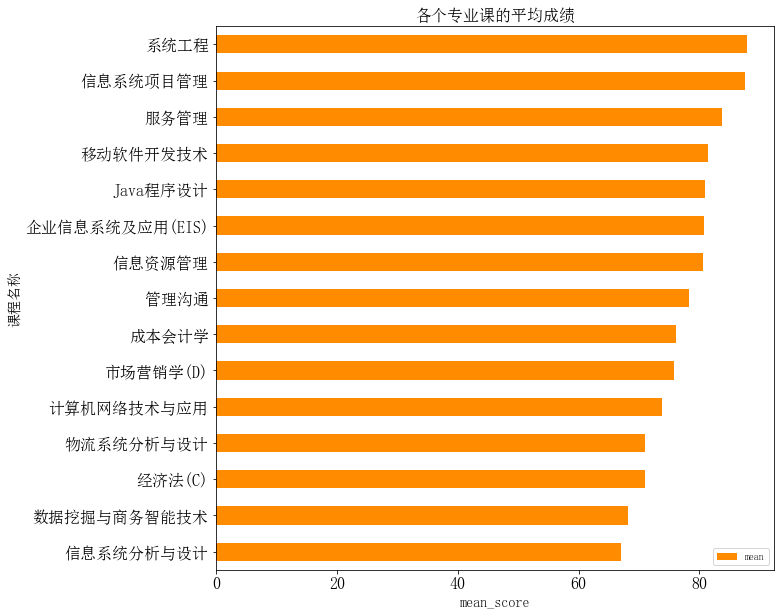

In [36]:
axs = discribe.sort_values(by='mean').plot(kind='barh',y='mean',figsize=(10,10),fontsize=16,color='#FF8C00')
axs.set_ylabel('课程名称',fontsize=14)
axs.set_xlabel('mean_score',fontsize=14)
axs.set_title('各个专业课的平均成绩',fontsize=16)
plt.show()

axs = discribe.sort_values(by='var').plot(kind='barh',y='var',figsize=(10,10),fontsize=16,color='#FF8C00')
axs.set_ylabel('课程名称',fontsize=14)
axs.set_xlabel('方差',fontsize=14)
axs.set_title('各个专业课的成绩方差',fontsize=16)
plt.show()

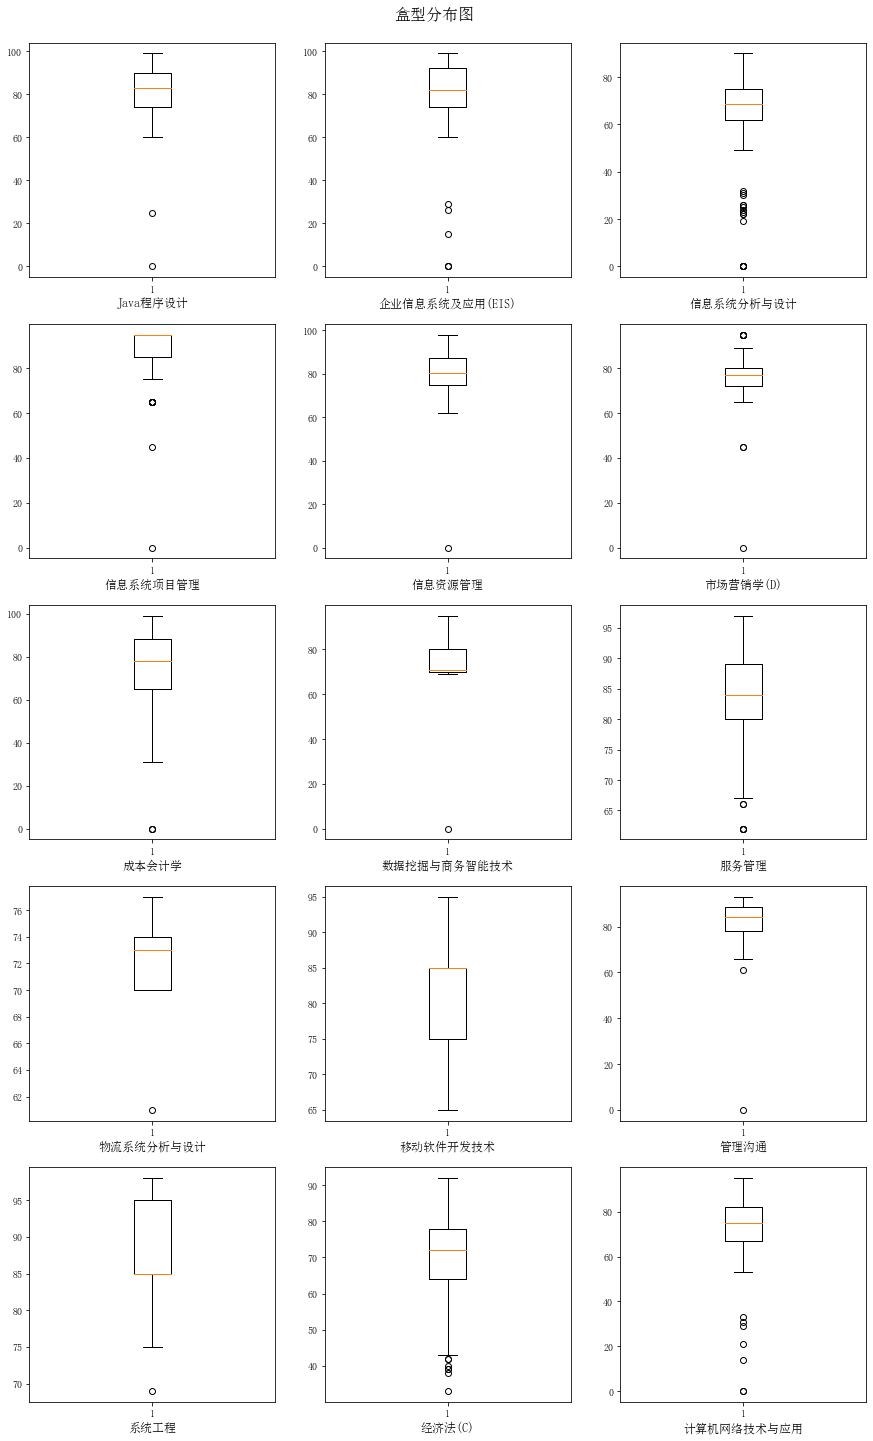

In [37]:
def box_plot(group_data,plot_box=True,notch=False,patch_artist=False,showmeans=False):
    g_num = len(group_data)
    fig_w = 3
    fig_h = math.ceil(g_num/fig_w)
    fig_size = 5
    fig, aix = plt.subplots(fig_h,fig_w,figsize=(fig_w*fig_size,fig_h*fig_size))
    fig.suptitle('盒型分布图',fontsize=16,x=0.5,y=0.9) 
    for i,(k,v) in enumerate(group_data):
        if(plot_box):
            aix[i//fig_w][i%fig_w].boxplot(v['总成绩'],showmeans=showmeans,patch_artist=patch_artist,notch=notch,vert=True)
        else:
            aix[i//fig_w][i%fig_w].violinplot(v['总成绩'],showmeans=showmeans)
    #     aix[i//fig_w][i%fig_w].set_title('')
        aix[i//fig_w][i%fig_w].set_xlabel(k,fontsize=12)
    plt.show()
box_plot(group_data,plot_box=True)

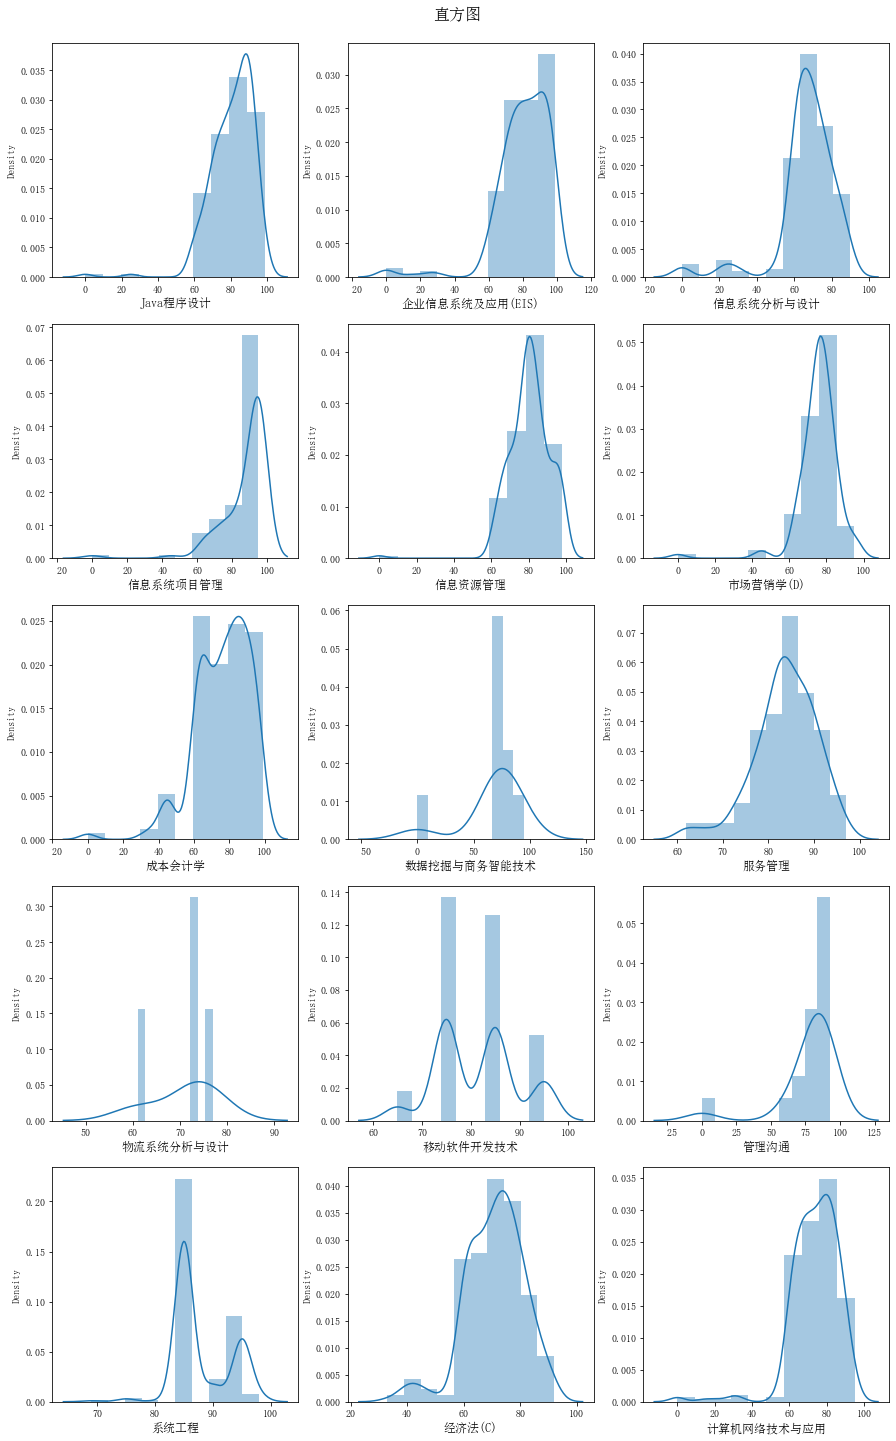

In [38]:
def hist_plot(group_data,bins=None):
    if bins is None:
        bins = [10] * len(group_data)
    
    g_num = len(group_data)
    fig_w = 3
    fig_h = math.ceil(g_num/fig_w)
    fig_size = 5
    fig, aix = plt.subplots(fig_h,fig_w,figsize=(fig_w*fig_size,fig_h*fig_size))
    fig.suptitle('直方图',fontsize=16,x=0.5,y=0.9) 
    for i,(k,v) in enumerate(group_data):
        n, _bins, patches = aix[i//fig_w][i%fig_w].hist(v['总成绩'],bins=bins[i])
    #     aix[i//fig_w][i%fig_w].set_title('')
        aix[i//fig_w][i%fig_w].set_xlabel(k,fontsize=12)
    plt.show()
hist_plot(group_data)


def hist_plot2(group_data,bins=None,kde=True):
    if bins is None:
        bins = [None] * len(group_data)
    
    g_num = len(group_data)
    fig_w = 3
    fig_h = math.ceil(g_num/fig_w)
    fig_size = 5
    fig, aix = plt.subplots(fig_h,fig_w,figsize=(fig_w*fig_size,fig_h*fig_size))
    fig.suptitle('直方图',fontsize=16,x=0.5,y=0.9) 
    for i,(k,v) in enumerate(group_data):
        aix = plt.subplot(fig_h,fig_w,i+1)
        sns.distplot(v['总成绩'],bins=bins[i],kde=kde)
    #     aix[i//fig_w][i%fig_w].set_title('')
        aix.set_xlabel(k,fontsize=12)
    plt.show()
hist_plot2(group_data,bins=[10,10,10,10,10,10,10,10,10,10,10,10,10,10,10])

从盒形图和只放图可以得到以下结论：<br>
- 并不是有的课程的成绩都是大致服从正态分布的，例如 企业信息系统及应用(EIS)、信息系统项目管理、成本会计学、管理沟通并不服从正太分布，其他的可近似为正太分布
- 大部分课程的均值都在80分上下，但是 信息系统分析与设计、物流系统分析与设计、经济法(C)均分在70分左右，说明这三门课程的可能存在一定的问题，系统工程	和 信息系统项目管理的均分都超过了87，说明这两门课程的设置的比较容易。
- 系统工程的方差最小，成绩分布最集中，均值较高，课程最容易